In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
league_10 = pd.read_csv("data/season-0910_csv.csv")

In [4]:
def points(df, team):
    """Get point count for a team.
    Note:
     - Assigning -3 to a loss for visual purposes.
     """
    
    df = df[(df.HomeTeam==team) | (df.AwayTeam==team)]
    vals = df.values
    points = np.zeros(df.shape[0])
    running_count = 0
    for row in range(len(vals)):
        if vals[row][1] == team and vals[row][5] == "H":
            running_count += 3
            points[row] = running_count
        elif vals[row][2] == team and vals[row][5] == "A":
            running_count += 3
            points[row] = running_count
        elif vals[row][1] == team and vals[row][5] == "D":
            running_count += 1
            points[row] = running_count
        elif vals[row][2] == team and vals[row][5] == "D":
            running_count += 1
            points[row] = running_count
        else:
            running_count += -3
            points[row] += running_count
    return points

In [5]:
def race_top4(df):
    """Get season long progression of top four teams at the end of the season."""
    
    teams = df.HomeTeam.unique()
    index = pd.DataFrame(list(df.index), columns=["Index"]).set_index("Index")
    index["Date"] = df.Date
    team_info = []
    for team in teams:
        curr_team = df[(df.HomeTeam == team) | (df.AwayTeam == team)]
        curr_team[team + "_Points"] = points(curr_team, team)
        curr = curr_team[[team+"_Points"]]
        index = index.join(curr, how="left")
    for team in index.columns:
        curr_points = 0
        for row in range(len(index[team])):
            if index[team].iloc[row] != index[team].iloc[row]:
                index[team].iloc[row] = curr_points
                curr_points = index[team].iloc[row]
            else:
                curr_points = index[team].iloc[row]
    last_week = index.iloc[-1].drop("Date").sort_values(ascending=False)
    index = index.set_index("Date")
    top_4 = last_week.head(4).index
    top_4 = index[top_4]
    return top_4

In [1]:
top4 = race_top4(league_10)

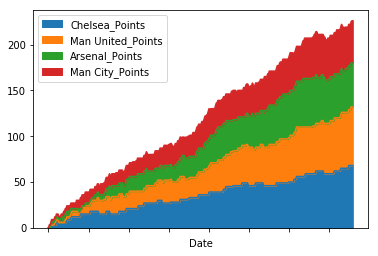

In [17]:
top4.plot.area()
plt.show()

In [18]:
top4.reset_index(inplace=True)
top4.to_csv("data/stacked.csv", index=False)